## Pandas로 시각화하기


In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found


In [8]:
from sklearn.datasets import load_iris

In [2]:
# 우선 실행해 주세요
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.datasets import load_iris

# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

ModuleNotFoundError: No module named 'sklearn'

## 예제 데이터 ) IRIS Dataset

아이리스(붓꽃) 꽃에 대한 데이터 셋으로, 꽃잎의 각 부분의 너비와 길이 등을 측정한 데이터이며 150개의 row가 있습니다. 

![](http://cfs13.tistory.com/original/27/tistory/2009/11/29/22/54/4b127d29159f6)

| feature name | 의미 |
| ---- |---- |
| sepal length | 꽃받침의 길이 정보 |
| sepal width  | 꽃받침의 너비 정보 |
| petal length | 꽃잎의 길이 정보 |
| petal width  | 꽃잎의 너비 정보 |
| species | 꽃의 종류. setosa / versicolor / virginica의 세종류가 있음 |

In [9]:
# 우선 실행해주세요!
dataset = load_iris()
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
target = pd.Series(dataset['target']).map({0:"setosa",1:"versicolor",2:'virginica'})
df['species'] = target

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
33,5.5,4.2,1.4,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa
68,6.2,2.2,4.5,1.5,versicolor
83,6.0,2.7,5.1,1.6,versicolor
136,6.3,3.4,5.6,2.4,virginica


## 문제 1) 꽃의 종류에 따른 평균 꽃받침의 길이 비교 

![Imgur](https://i.imgur.com/7lDivi5.png)


#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

***주의***
* 브라우저나 jupyter의 버전 별로 출력된 형태가 다를 수 있습니다. 
* 색상이나 폰트 보다, 내용과 시각화된 요소들을 위주로 빠짐없이 구현해 주세요

In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211:

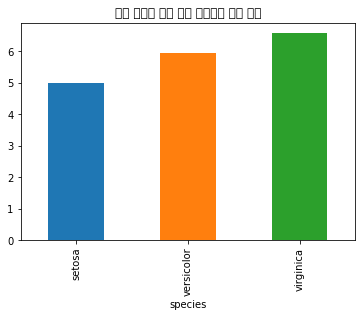

In [11]:
sepal = df.groupby('species')['sepal length (cm)'].mean()
sepal.plot(kind='bar', colors=['C0', 'C1', 'C2'])
plt.title('꽃의 종류에 따른 평균 꽃받침의 길이 비교')
plt.xlabel('species')

plt.show()

## 문제 2. 꽃잎의 길이와 너비의 산포도

![Imgur](https://i.imgur.com/PwlLid5.png)

In [12]:
# 우선 실행해주세요!
dataset = load_iris()
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
target = pd.Series(dataset['target']).map({0:"setosa",1:"versicolor",2:'virginica'})
df['species'] = target

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

***주의***
* 브라우저나 jupyter의 버전 별로 출력된 형태가 다를 수 있습니다. 
* 색상이나 폰트 보다, 내용과 시각화된 요소들을 위주로 빠짐없이 구현해 주세요

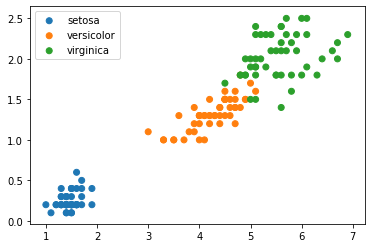

In [30]:
fig, ax = plt.subplots()
encodes = target.astype('category').cat.codes
df['color'] = ['C{}'.format(encode) for encode in encodes]
for label, sub_df in df.groupby('species'):
    ax.scatter(x=sub_df['petal length (cm)'], 
               y=sub_df['petal width (cm)'], 
               color=sub_df['color'], 
               label=label)
ax.legend()